In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm 
from scipy.stats import t
from scipy.stats import chi2
from scipy import integrate

In [2]:
def GetHisto(Data,bines):
    
    h, bins = np.histogram(Data,bins=bines)
    w = np.diff(bins)   # Ancho de clase
    m = bins[:-1] + 0.5*w[0] # Marca de clase
    
    hnorm = h/np.sum(h*w)
    
    return h,hnorm,m,w

In [3]:
N = 10000

In [4]:
# Exponencial
alpha = 3
expo = expon.rvs( size = N, scale = alpha)

In [5]:
xbins = np.linspace(np.min(expo),np.max(expo),50)
Hb,HNb,mb,w = GetHisto(expo,xbins)

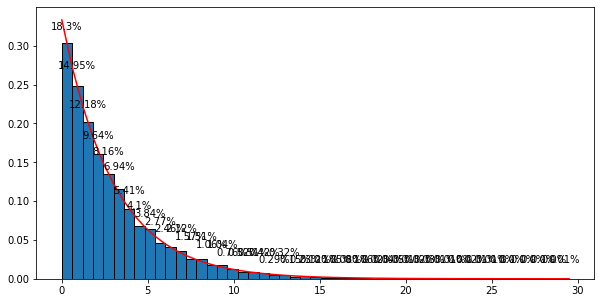

In [6]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.bar(mb,HNb, width=w, ec='k')
ax.plot(xbins, expon.pdf(xbins,scale=alpha), color='r')
#ax.set_ylim(0,0.5)

for i in range(len(mb)):
    ax.text( mb[i], 0.02 + np.round( HNb[i],2 ), \
             str( np.round( HNb[i]*w[i]*100, 2 ))+'%', ha='center', fontsize=10)

In [7]:
expo.mean()

3.0018712216627836

In [8]:
np.sum(HNb*w*(mb))

3.010299599212627

In [9]:
# Percentile 97.5
expon.ppf(0.975,scale=alpha)

11.066638362341806

In [10]:
# Normal
mu, sigma = 0.,1.
normal = norm.rvs(loc=mu, scale=sigma, size=N)

In [11]:
xbins = np.linspace(np.min(normal),np.max(normal),50)
Hb,HNb,mb,w = GetHisto(normal,xbins)

In [12]:
# Comprobamos el area del histograma
np.sum(HNb*w)

0.9999999999999999

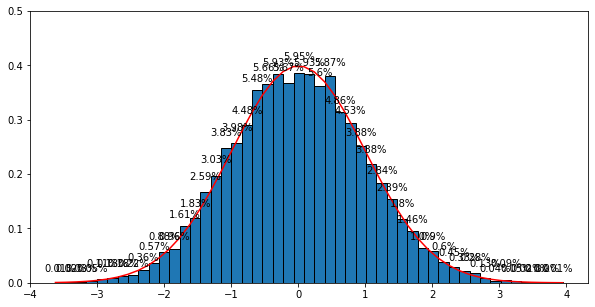

In [13]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.bar(mb,HNb, width=w, ec='k')
ax.plot(xbins, norm.pdf(xbins,loc=mu,scale=sigma), color='r')
ax.set_ylim(0,0.5)

for i in range(len(mb)):
    ax.text( mb[i], 0.02 + np.round( HNb[i],2 ), \
             str( np.round( HNb[i]*w[i]*100, 2 ))+'%', ha='center', fontsize=10)

In [14]:
normal.mean()

-0.003767111376595011

In [15]:
np.sum(HNb*w*(mb))

-0.004244211570681188

In [16]:
norm.ppf(0.975)

1.959963984540054

In [17]:
# Distribucion t
df = 5
tStu = t.rvs( df, size= N )

In [18]:
xbins = np.linspace(np.min(tStu),np.max(tStu),50)
Hb,HNb,mb,w = GetHisto(tStu,xbins)

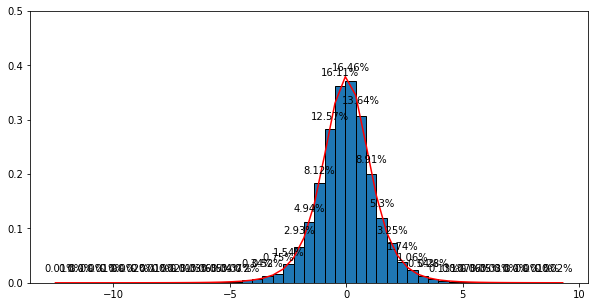

In [19]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.bar(mb,HNb, width=w, ec='k')
ax.plot(xbins, t.pdf(xbins,df=df), color='r')
ax.set_ylim(0,0.5)

for i in range(len(mb)):
    ax.text( mb[i], 0.02 + np.round( HNb[i],2 ), \
             str( np.round( HNb[i]*w[i]*100, 2 ))+'%', ha='center', fontsize=10)

In [20]:
tStu.mean()

-0.005245278790335355

In [21]:
np.sum(HNb*w*(mb))

-0.006293696831481621

In [22]:
t.ppf( 0.975, df=df )

2.5705818366147395

In [23]:
# Chi2 
df = 5
Chi2 = chi2.rvs( df, size= N )

In [24]:
xbins = np.linspace(np.min(Chi2),np.max(Chi2),50)
Hb,HNb,mb,w = GetHisto(Chi2,xbins)

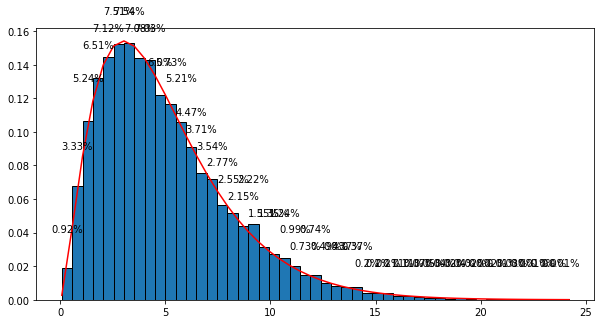

In [25]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

ax.bar(mb,HNb, width=w, ec='k')
ax.plot(xbins, chi2.pdf(xbins,df=df), color='r')
#ax.set_ylim(0,0.5)

for i in range(len(mb)):
    ax.text( mb[i], 0.02 + np.round( HNb[i],2 ), \
             str( np.round( HNb[i]*w[i]*100, 2 ))+'%', ha='center', fontsize=10)

In [26]:
chi2.ppf(0.975, df=df)

12.832501994030027